Linear regression in python on our real estate dataset from dataworld

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
real_estate = pd.read_csv(r'/home/roy/Downloads/datasets-main/Real estate.csv')

real_estate.head()
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


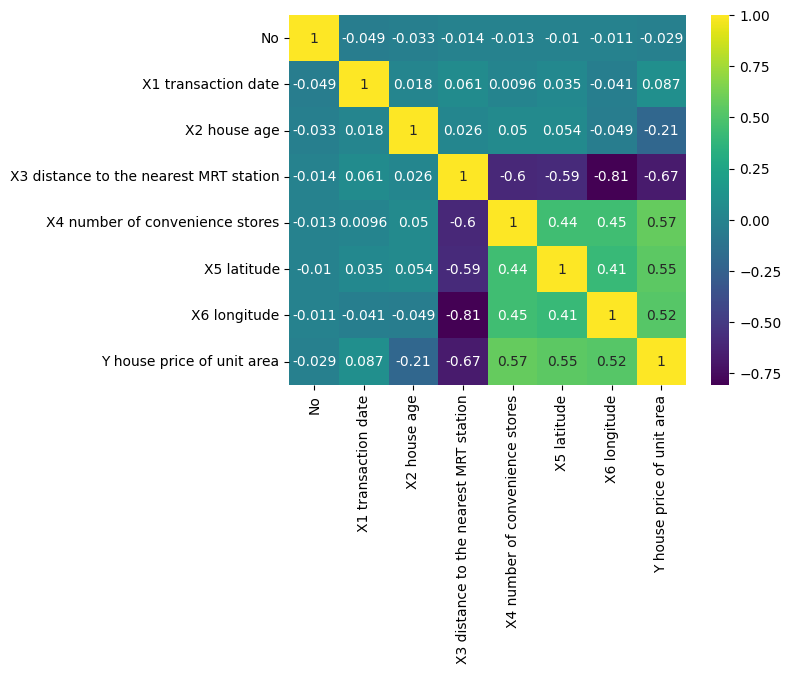

In [4]:
CorrMatrix = real_estate.corr()
sns.heatmap(CorrMatrix,annot=True,cmap="viridis")
plt.show()

In [28]:
X = real_estate.drop(['Y house price of unit area','X2 house age'],axis=1)
Y =real_estate['Y house price of unit area']

X_train, X_test, Y_train ,Y_test = train_test_split(X,Y,test_size= 0.2, random_state=42)

In [29]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [30]:
Trainig_data_prediction = lin_reg_model.predict(X_train)

In [31]:
train_error_score = metrics.r2_score(Y_train,Trainig_data_prediction)
print("R squared Error - Training:",train_error_score)

R squared Error - Training: 0.5123741268727138


In [32]:
#Prediction on testing data
Y_Prediction = lin_reg_model.predict(X_test)
test_error_score = metrics.r2_score(Y_test,Y_Prediction)

<AxesSubplot: xlabel='Y house price of unit area'>

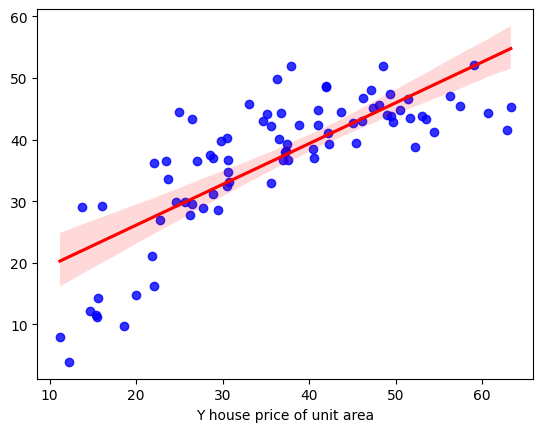

In [33]:
#Scatter plot
sns.regplot(x =Y_test,y = Y_Prediction,scatter_kws={"color":"blue"},line_kws={"color":"red"})